<a href="https://colab.research.google.com/github/albertocastillosm/assignment-bank/blob/master/Copy_of_componentes_principales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Componentes principales </h1></center>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/mechainimsm of action/datas/temp_csv')


<center><img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR0a46JzS9x-Fs5kC3DVG1g6FdEtadsOkomEg&usqp=CAU' width=400, height=100 ></center>

<h4><li><b>g-</b> : Las características significan datos de expresión génica</li></h4>
<h4><li><b>c-</b> : significan datos de viabilidad celula</li></h4>

In [ ]:
train_f=pd.read_csv('train_features.csv')
test_f=pd.read_csv('test_features.csv')

In [ ]:
train_f.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
train_f.shape

(23814, 876)

In [ ]:
train_f.isnull().sum().sum()

0

In [ ]:
train_f['cp_time'].unique()

array([24, 72, 48])

In [ ]:
set_var=set(train_f.select_dtypes(exclude='O').columns)-set(['cp_time'])

In [ ]:
train_f2=train_f[set_var].copy()

In [ ]:
train_f2.head()

,g-291,g-457,c-29,g-58,g-507,g-243,g-134,g-315,g-518,g-219,...,g-110,g-424,g-635,g-580,g-646,g-228,g-402,g-71,g-258,g-67
0,0.3860,0.6799,0.6078,0.5790,-0.5311,-1.2160,0.3539,0.3810,0.2890,0.2482,...,-0.7635,-0.6908,-0.2461,-0.2458,0.8418,1.1080,-0.5394,-0.5369,-4.2300,-0.4195
1,-0.4210,0.7380,0.0474,0.3249,-0.5073,0.5680,-0.3062,0.7363,-0.6917,-0.4611,...,0.7302,-0.6122,-0.2341,0.0863,-0.3301,-0.0554,-0.2157,0.0720,-2.8660,0.0954
2,-0.3652,0.4051,0.6225,-0.1757,0.5718,1.0280,0.6535,0.3318,-0.9788,-0.1942,...,-0.1204,0.3672,0.7849,0.5040,0.0083,0.0423,-0.4724,0.6801,0.6456,0.0939
3,0.7247,0.2905,-0.3250,0.0899,1.9540,0.8285,-1.2910,0.3369,0.2775,0.2921,...,-0.7025,1.3760,0.7685,-0.0759,0.4617,-0.6012,0.2314,0.9767,0.1154,0.1186
4,0.0000,0.0614,0.0587,0.7709,0.9321,0.2817,-0.1871,-0.7069,-0.2938,-0.5558,...,-0.2246,0.9530,-0.3988,1.4920,-0.4773,0.5843,-1.7720,0.5801,1.4300,0.1255


## Correlaciones 

In [ ]:
df_corr=train_f2.corr()

In [ ]:
df_corr.head()

,g-291,g-457,c-29,g-58,g-507,g-243,g-134,g-315,g-518,g-219,...,g-110,g-424,g-635,g-580,g-646,g-228,g-402,g-71,g-258,g-67
g-291,1.000000,0.118238,0.608728,0.360511,-0.083637,-0.653636,0.183480,0.467534,-0.054889,-0.085647,...,0.271557,-0.507464,-0.427124,-0.382546,-0.493164,0.577453,-0.456685,-0.127303,-0.304613,0.576841
g-457,0.118238,1.000000,0.093210,0.012264,0.086331,-0.142523,0.103073,0.320547,-0.030041,-0.001667,...,0.035379,-0.101705,-0.051322,-0.106482,-0.099014,0.026597,-0.162694,-0.046348,0.057316,-0.000481
c-29,0.608728,0.093210,1.000000,0.490807,-0.145326,-0.708628,0.424039,0.524478,-0.195166,-0.128995,...,0.224789,-0.622898,-0.390256,-0.463983,-0.580802,0.736141,-0.563448,-0.016665,-0.270012,0.705990
g-58,0.360511,0.012264,0.490807,1.000000,-0.093394,-0.519470,0.453004,0.433379,-0.064324,-0.074033,...,0.275786,-0.479016,-0.372723,-0.274862,-0.254373,0.633213,-0.427428,0.130926,-0.113996,0.525031
g-507,-0.083637,0.086331,-0.145326,-0.093394,1.000000,0.099962,0.049636,-0.062086,0.107775,0.051223,...,-0.113854,0.108423,0.028697,0.185776,0.109634,-0.160215,0.005511,0.105877,0.292092,-0.161848


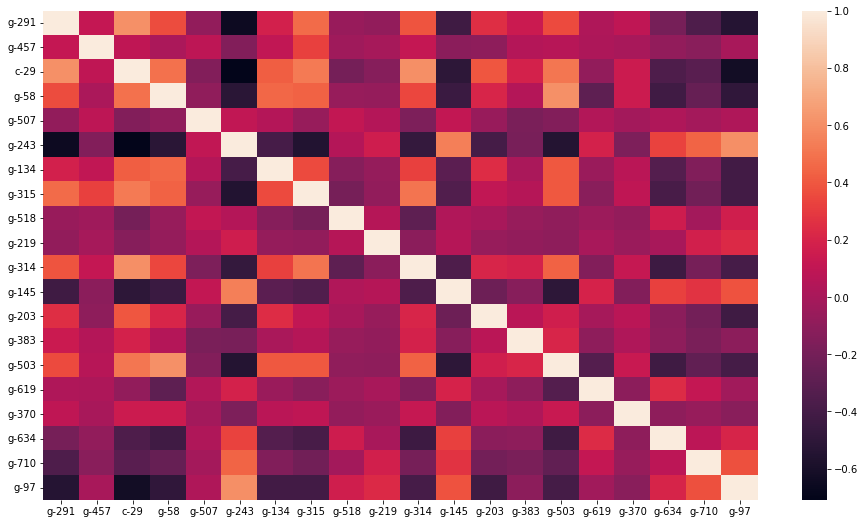

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df_corr.iloc[:20,:20])

## Escalado de variables

In [ ]:
from  sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler()

In [ ]:
std_train=std.fit_transform(train_f2)

In [ ]:
test_f2=test_f[set_var].copy()

In [ ]:
std_test=std.transform(test_f2)

## Componentes 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA().fit(std_train)

In [ ]:
ar_varianza=pca.explained_variance_ratio_

In [ ]:
=np.cumsum(ar_varianza)

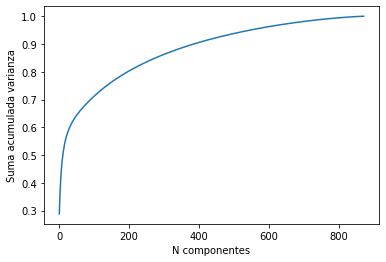

In [ ]:
plt.plot(np.cumsum(ar_varianza))
plt.xlabel('N componentes')
plt.ylabel('Suma acumulada varianza')
plt.show()

In [ ]:
ar_pca_sum=np.cumsum(ar_varianza)

In [ ]:
np.where((ar_pca_sum>0.8) & (ar_pca_sum<0.9))

(array([196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
        209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
        222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
        235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
        248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
        261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
        274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
        287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
        300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
        313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
        326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
        339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
        352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
        365, 366, 367, 368, 369, 370, 371, 372, 373

In [ ]:
n_componentes=197

## N componentes elegido 

In [ ]:
pca_v2=PCA(n_components=197)
pca_valor=pca_v2.fit_transform(std_train)

In [ ]:
pca_v2.components_.T

(872, 197)

In [ ]:
list_namepca=[f'PC{i}' for i in range(1,198)]

In [ ]:
df_pca_loading=pd.DataFrame(pca_v2.components_.T,columns=list_namepca,index=set_var)

In [ ]:
df_pca_loading.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197
g-291,-0.042213,-0.068026,0.003997,-0.004068,-0.054496,0.017118,0.024478,-0.046152,-0.005784,0.036394,...,-0.011118,-0.012427,-0.012378,-0.010780,0.010885,-0.008377,0.026872,-0.003240,-0.002235,0.025434
g-457,-0.006615,-0.003012,0.027145,-0.046824,-0.042767,-0.024156,-0.005961,-0.011275,-0.085067,0.021018,...,0.031245,-0.093061,-0.067253,0.095144,-0.015116,-0.021940,0.135872,0.077674,0.145261,0.019267
c-29,-0.053561,-0.028963,-0.004327,-0.006719,0.026072,0.006118,0.003575,0.003407,-0.014974,0.013144,...,0.016375,-0.007191,0.011691,0.009138,-0.006712,0.011063,-0.032908,0.002444,-0.000533,0.006534
g-58,-0.042614,0.070825,-0.023865,0.025786,-0.029474,0.023561,0.028658,-0.019674,-0.026656,0.005112,...,0.014903,-0.003695,-0.000215,0.010831,-0.006231,0.000041,0.028242,0.021023,0.010894,0.000726
g-507,0.008786,0.014996,-0.051853,-0.060052,-0.061204,-0.002339,-0.056753,-0.033527,0.006246,0.029656,...,0.058493,0.002457,-0.014330,0.020994,-0.003905,0.010458,-0.013427,-0.004293,-0.121314,0.043389


In [ ]:
df_pca_loading[['PC1']].apply(lambda x:sum(x**2))

PC1    1.0
dtype: float64